This is the simple workflow with graph

In [44]:
! pip install langchain langgraph langchain_community langchain_groq langchain_huggingface langchain_text_splitters

In [45]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    return input2 + " and am from second function"

In [46]:
from langgraph.graph import Graph

In [47]:
workflow1 = Graph()

In [48]:
workflow1.add_node("function1", function1)
workflow1.add_node("function2", function2)

In [49]:
workflow1.add_edge("function1", "function2")

In [50]:
workflow1.set_entry_point("function1")

In [51]:
workflow1.set_finish_point("function2")

In [52]:
app1 = workflow1.compile()

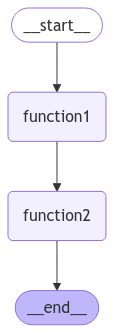

In [53]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [54]:
app1.invoke("Hi this is sowmya ")

'Hi this is sowmya from first function and am from second function'

In [55]:
input = "Hi this is sowmya "

for output in app1.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("---")
        print(value)
        print("\n")

here is output from function1
---
Hi this is sowmya from first function


here is output from function2
---
Hi this is sowmya from first function and am from second function




---------------------------------------

In [56]:
def function3(input3):
    return input3

In [57]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output = function3("this is function3 inbetween")
    return input2 + " " + output + " and am from second function"

In [58]:
workflow2 = Graph()

In [59]:
workflow2.add_node("function1", function1)
workflow2.add_node("function2", function2)

In [60]:
workflow2.add_edge("function1", "function2")

In [61]:
workflow2.set_entry_point("function1")

In [62]:
app2 = workflow2.compile()

In [63]:
input = "hi this is sowmya "

for output in app2.stream(input):
    for key, value in output.items():
        print(f"here is output from{key}")
        print("----")
        print(value)
        print("\n")

here is output fromfunction1
----
hi this is sowmya from first function


here is output fromfunction2
----
hi this is sowmya from first function this is function3 inbetween and am from second function




-------

Now lets create workflow with llm

In [64]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')

In [65]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [66]:
def function1(input):
    llm = ChatGroq(model="gemma2-9b-it")
    response = llm.invoke(input).content
    return response

In [67]:
def function2(input):
    return input.upper()

In [68]:
from langgraph.graph import Graph

workflow2 = Graph()

In [69]:
workflow2.add_node("llm", function1)
workflow2.add_node("upper_string", function2)

In [70]:
workflow2.add_edge("llm", "upper_string")

In [71]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [72]:
app2 = workflow2.compile()

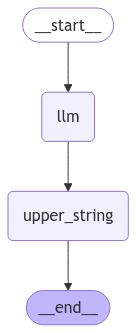

In [73]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [74]:
app2.invoke("who is the indian iron man?")

'THE INDIAN IRON MAN IS **JRD TATA**. \n\nHE IS WIDELY REGARDED AS A VISIONARY INDUSTRIALIST AND A PIONEER OF INDIAN AVIATION. JRD TATA PLAYED A CRUCIAL ROLE IN BUILDING TATA INDUSTRIES AND ESTABLISHING AIR INDIA, MAKING HIM A SYMBOL OF INDUSTRIAL PROGRESS AND NATIONAL PRIDE IN INDIA. \n'

In [75]:
print(app2.invoke("what is genai explain in detail?"))

LET'S BREAK DOWN WHAT GENAI IS ALL ABOUT.

**GENAI: THE CREATIVE SPARK OF ARTIFICIAL INTELLIGENCE**

GENAI STANDS FOR **GENERATIVE ARTIFICIAL INTELLIGENCE**. IT'S A POWERFUL SUBSET OF AI FOCUSED ON CREATING NEW CONTENT RATHER THAN SIMPLY ANALYZING EXISTING DATA. THINK OF IT LIKE THIS: TRADITIONAL AI IS GREAT AT RECOGNIZING PATTERNS AND MAKING PREDICTIONS BASED ON WHAT IT'S ALREADY SEEN. GENAI TAKES IT A STEP FURTHER BY LEARNING THOSE PATTERNS AND USING THEM TO GENERATE SOMETHING ENTIRELY ORIGINAL.

**HOW GENAI WORKS: LEARNING FROM THE DATA SEA**

AT THE HEART OF GENAI LIES **DEEP LEARNING**, A TYPE OF MACHINE LEARNING THAT USES ARTIFICIAL NEURAL NETWORKS. THESE NETWORKS ARE INSPIRED BY THE STRUCTURE OF THE HUMAN BRAIN AND ARE TRAINED ON MASSIVE DATASETS OF TEXT, IMAGES, AUDIO, OR EVEN CODE.

DURING TRAINING, THE GENAI MODEL LEARNS THE UNDERLYING STRUCTURE AND RELATIONSHIPS WITHIN THE DATA. IT FIGURES OUT HOW WORDS GO TOGETHER IN SENTENCES, HOW COLORS BLEND IN PAINTINGS, OR HOW MUSICAL 

In [76]:
input = "who is the first prime minister in india?"

for output in app2.stream(input):
    for key, value in output.items():
        print(f"here is output from `{key}`")
        print("----")
        print(value)
        print("\n")

here is output from `llm`
----
The first Prime Minister of India was **Jawaharlal Nehru**. 



here is output from `upper_string`
----
THE FIRST PRIME MINISTER OF INDIA WAS **JAWAHARLAL NEHRU**. 





----------

Here lets create our own output token counter

In [77]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token number is {token_number}"
    return token_number

In [78]:
workflow3 = Graph()

workflow3.add_node("llm", function1)
workflow3.add_node("token_counter", function3)

workflow3.add_edge("llm", "token_counter")

workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")

app3 = workflow3.compile()

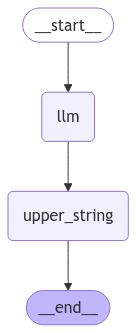

In [79]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [80]:
app3.invoke("who is the first prime minister in india?")

'total token number is 9'

In [81]:
app3.invoke("what is genai explain in detail?")

'total token number is 469'

----

Question: Can we integrate a RAG Pipeline?

Answer: Yes we can!

In [82]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [83]:
llm.invoke("hi").content

'Hi there! 👋 \n\nWhat can I do for you today?\n'

In [84]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [85]:
!pip install chromadb

In [86]:
loader = DirectoryLoader("/content/data", glob="*.txt", loader_cls=TextLoader)
docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
    )
new_docs = text_splitter.split_documents(documents=docs)
doc_string = [doc.page_content for doc in new_docs]

db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k":3})

query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '/content/data/indian_economy.txt'}
or global market volatility that could impact growth.” The government has announced targeted fiscal
page_content='or global market volatility that could impact growth.” The government has announced targeted fiscal' metadata={'source': '/content/data/indian_economy.txt'}
page_content='strengthened ties and demand for Indian IT services and pharmaceuticals.' metadata={'source': '/content/data/indian_economy.txt'}
page_content='sector saw a 3.2% increase in output in January.' metadata={'source': '/content/data/indian_economy.txt'}


<ipython-input-86-814c50c0ac23>:14: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


In [87]:
def function_1(AgentState):
    message = AgentState['messages']
    question = message[-1]

    complete_prompt = "Your task is to provide only the bried answer based on the user query. \
        don't include too much reasoning. Following is the user query: " + question

    response = llm.invoke(complete_prompt)

    AgentState['messages'].append(response.content)  # appending LLM call response to the AgentState

    return AgentState

In [88]:
def function_2(AgentState):
  messages = AgentState['messages']
  question = messages[0] ## Fetching the user question

  template = """Answer the question based on the following context:
  {context}

  Question: {question}
  """
  prompt = ChatPromptTemplate.from_template(template)

  retrieval_chain = (
      {"context": retriever, "question": RunnablePassthrough()}
      | prompt
      | llm
      | StrOutputParser()
  )
  result = retrieval_chain.invoke(question)
  return result

In [89]:
# Define a Langchain Graph

workflow4 = Graph()

workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge("LLM", "RAGtool")
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")

app4 = workflow4.compile()

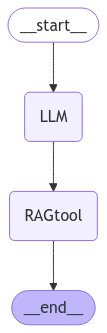

In [90]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [91]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [92]:
for output in app4.stream(inputs):
  for key, value in output.items():
    print(f"Output from node {key}")
    print("----")
    print(value)
    print("\n")

Output from node LLM
----
{'messages': ['Tell me about llama3 model', 'Llama 3 is an open-source large language model developed by Meta. \n']}


Output from node RAGtool
----
The provided context contains information about India's economy and doesn't offer any details about the llama3 model.  

To get information about the llama3 model, you'd need to consult a different source. Llama3 is likely a large language model developed by Meta. You can probably find details about it on the Meta AI website or through a general web search. 





In [93]:
AgentState = {}

In [94]:
AgentState['messages'] = []

In [95]:
AgentState['messages'].append('hi how are you')

In [96]:
AgentState

{'messages': ['hi how are you']}

In [97]:
AgentState['messages'].append('what is llama3')

In [98]:
AgentState

{'messages': ['hi how are you', 'what is llama3']}

# # Complex graph

In [99]:
loader2 = DirectoryLoader("/content/data", glob="*.txt", loader_cls=TextLoader)
docs2 = loader2.load()

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(docs2)
doc_string2 = [doc.page_content for doc in new_docs2]

db2 = Chroma.from_documents(documents=new_docs2, embedding=embeddings, collection_name="my_chroma_db")
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [100]:
query = "Tell me about India's Industrial Growth?"

docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
  print(doc)

{'source': '/content/data/indian_economy.txt'}
India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': '/content/data/indian_economy.txt'}
page_content='Industrial Revival and Economic Optimism for India' metadata={'source': '/content/data/indian_economy.txt'}
page_content='for India’s economy. “We are encouraged by the steady rise in domestic consumption and industrial' metadata={'source': '/content/data/indian_economy.txt'}


In [101]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [102]:
class AgentState(TypedDict):
  # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
  # This implies we might want to "add" new messages to the sequence later
  messages: Annotated[Sequence[BaseMessage], operator.add]

In [103]:
from pydantic import BaseModel, Field

class TopicSelectionParser(BaseModel):
  Topic: str = Field(description="Selected Topic")
  Reasoning: str = Field(description="Reasoning behind topic selection")


In [104]:
from langchain.output_parsers import PydanticOutputParser

parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [120]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [105]:
def function_1(state):
  message = state['messages']
  question = message[-1]
  print(question)

  template="""
  Your task is to classify the given user query into the following categories: [India, Not Related].
  Only respond with the category name and nothing else

  User query: {question}
  {format_instructions}
  """

  prompt = PromptTemplate(
      template=template,
      input_variables=[question],
      partial_variables={
          "format_instructions": parser.get_format_instructions()
      }
  )
  chain = prompt | llm | parser

  response = chain.invoke({"question": question, "format_instructions": parser.get_format_instructions()})

  print(response)

  return {"messages": [response.Topic]}

In [106]:
def router(state):
  print("-> Router ->")

  messages = state['messages']
  last_message = messages[-1]
  print(last_message)
  if 'India' in last_message:
    return "RAG Call"
  else:
    return "LLM Call"

In [107]:
def function_2(state):
  print("-> Calling RAG ->")
  messages = state['messages']
  question = messages[0] # Fetching the user question
  print(question)

  template = """Answer the question based only on the following context:
  {context}

  Question: {question}
  """
  prompt = ChatPromptTemplate.from_template(template)

  print(prompt)

  retrieval_chain = (
      {"context": retriever, "question": RunnablePassthrough()}
      | prompt
      | llm
      | StrOutputParser()
  )
  result = retrieval_chain.invoke(question)
  return {"messages": [result]}


In [109]:
def function_3(state):
  print("-> Calling LLM ->")
  messages = state['messages']
  question = messages[0]

  complete_query = "Answer the following question with you knowledge of the real world. Following is the user question: " + question
  response = llm.invoke(complete_query)
  return {"messages": [response.content]}

In [110]:
from langgraph.graph import StateGraph, END

workflow5 = StateGraph(AgentState)  # StateGraph with AgentState

workflow5.add_node("agent", function_1)
workflow5.add_node("RAG", function_2)
workflow5.add_node("LLM", function_3)
workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM"
    }
)

workflow5.add_edge("RAG", END)
workflow5.add_edge("LLM", END)

app5 = workflow5.compile()


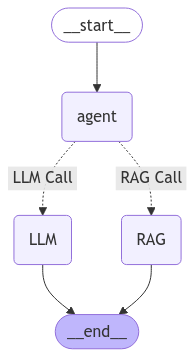

In [111]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [112]:
inputs = {"messages": ["Tell me about India's Industrial Growth"]}

In [113]:
output = app5.invoke(inputs)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query is about India's industrial growth."
-> Router ->
India
-> Calling RAG ->
Tell me about India's Industrial Growth
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n  {context}\n\n  Question: {question}\n  '), additional_kwargs={})]


In [114]:
inputs = {"messages": ["Tell me about first prime minister of india?"]}

In [115]:
output = app5.invoke(inputs)

Tell me about first prime minister of india?
Topic='India' Reasoning='The query asks about the first Prime Minister of India'
-> Router ->
India
-> Calling RAG ->
Tell me about first prime minister of india?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n  {context}\n\n  Question: {question}\n  '), additional_kwargs={})]


In [116]:
inputs = {"messages": ["Who build the Taj Mahal"]}

output = app5.invoke(inputs)

Who build the Taj Mahal
Topic='India' Reasoning='The Taj Mahal is located in India'
-> Router ->
India
-> Calling RAG ->
Who build the Taj Mahal
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n  {context}\n\n  Question: {question}\n  '), additional_kwargs={})]


In [117]:
output

{'messages': ['Who build the Taj Mahal',
  'India',
  'This document does not contain the answer to who built the Taj Mahal. \n']}

In [118]:
inputs = {"messages": ["Who is the president of us?"]}

output = app5.invoke(inputs)

Who is the president of us?
Topic='Not Related' Reasoning='The query asks about the president of the US, which is not related to India.'
-> Router ->
Not Related
-> Calling LLM ->


In [119]:
output

{'messages': ['Who is the president of us?',
  'Not Related',
  'The current president of the United States is **Joe Biden**. \n']}